<a href="https://colab.research.google.com/github/madhwanibhumika24/computer-vision-showcase/blob/main/AI%26ComputerVision%26%26CloudServiceOutageDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>

**FYMCA - D**

**Name - Patel Sneh**

**PRN - 1272250770**

---
</center>


# AI & Computer Vision Dataset


In [51]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np

# Download latest version
path = kagglehub.dataset_download("khushikyad001/ai-and-computer-vision-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ai-and-computer-vision-dataset' dataset.
Path to dataset files: /kaggle/input/ai-and-computer-vision-dataset


In [52]:

csv_file = [f for f in os.listdir(path)][0]
df = pd.read_csv(os.path.join(path, csv_file))

print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Dataset loaded with 2000 rows and 22 columns.


,ID,Category,Image_ID,Equation,Solution_Steps,Sign_Language,Sign_Text,Sign_Translation,Anomaly_Type,Anomaly_Score,...,Confidence_Score,Bounding_Box_X,Bounding_Box_Y,Bounding_Box_Width,Bounding_Box_Height,Blur_Level,Brightness_Level,Contrast_Level,Noise_Level,Label
0,1,Handwritten Math Solutions,IMG_4409,Σ(n=1 to ∞) 1/n^2,8.0,NaN,NaN,NaN,NaN,NaN,...,0.91,8,230,148,142,0.847947,0.526016,0.156290,0.704046,Incorrect
1,2,Security Camera Anomalies,IMG_1098,NaN,NaN,NaN,NaN,NaN,Loitering,0.11,...,0.99,56,426,145,104,0.694596,0.889878,0.214328,0.193889,Uncertain
2,3,Multi-lingual Street Signs,IMG_4901,NaN,NaN,Spanish,Yield,Alto,NaN,NaN,...,0.96,185,472,184,163,0.328324,0.582424,0.652709,0.283442,Uncertain
3,4,Multi-lingual Street Signs,IMG_6509,NaN,NaN,English,No Entry,Alto,NaN,NaN,...,0.74,137,393,109,193,0.391975,0.090846,0.905870,0.960370,Uncertain
4,5,Handwritten Math Solutions,IMG_9244,x^2 + y^2 = 25,6.0,NaN,NaN,NaN,NaN,NaN,...,0.54,405,243,155,60,0.350489,0.708919,0.899651,0.619847,Uncertain


/tmp/ipython-input-3585859983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='viridis')


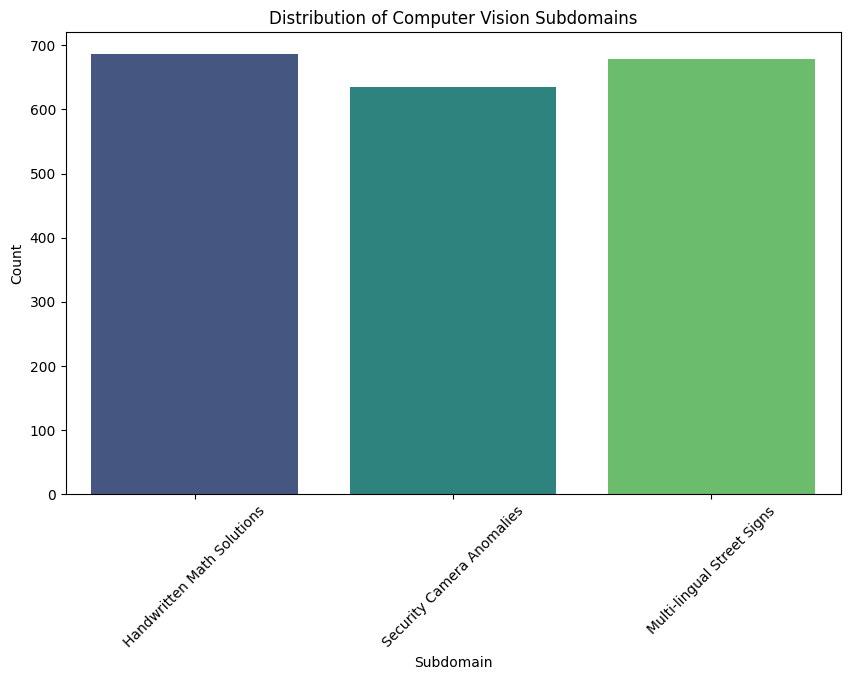

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Distribution of Computer Vision Subdomains')
plt.xlabel('Subdomain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

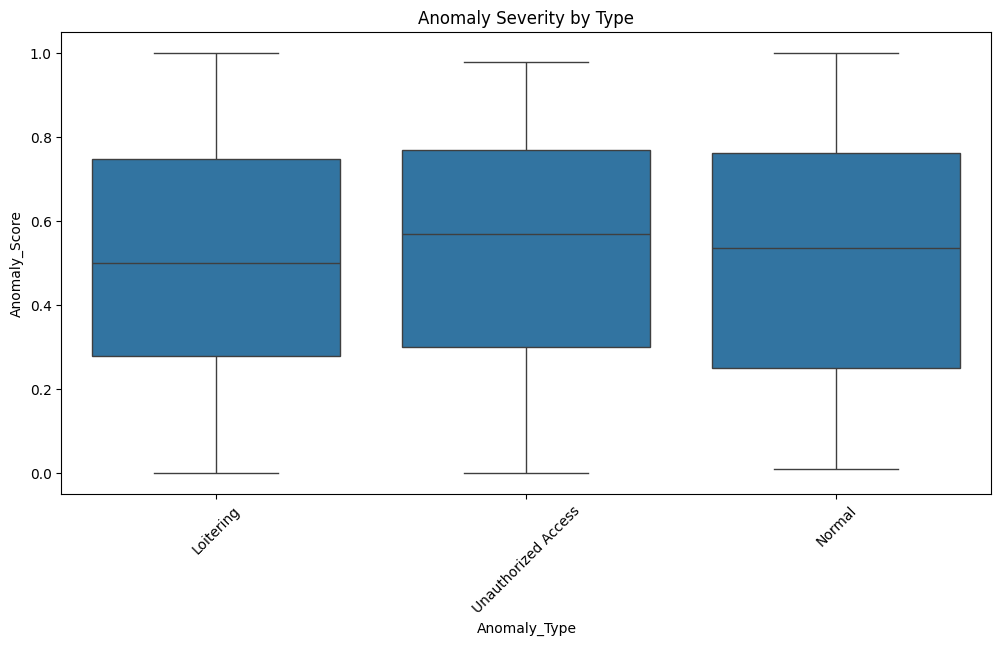

In [54]:
# Filtering for security-related data if the column exists
if 'Anomaly_Score' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Anomaly_Type', y='Anomaly_Score')
    plt.title('Anomaly Severity by Type')
    plt.xticks(rotation=45)
    plt.show()

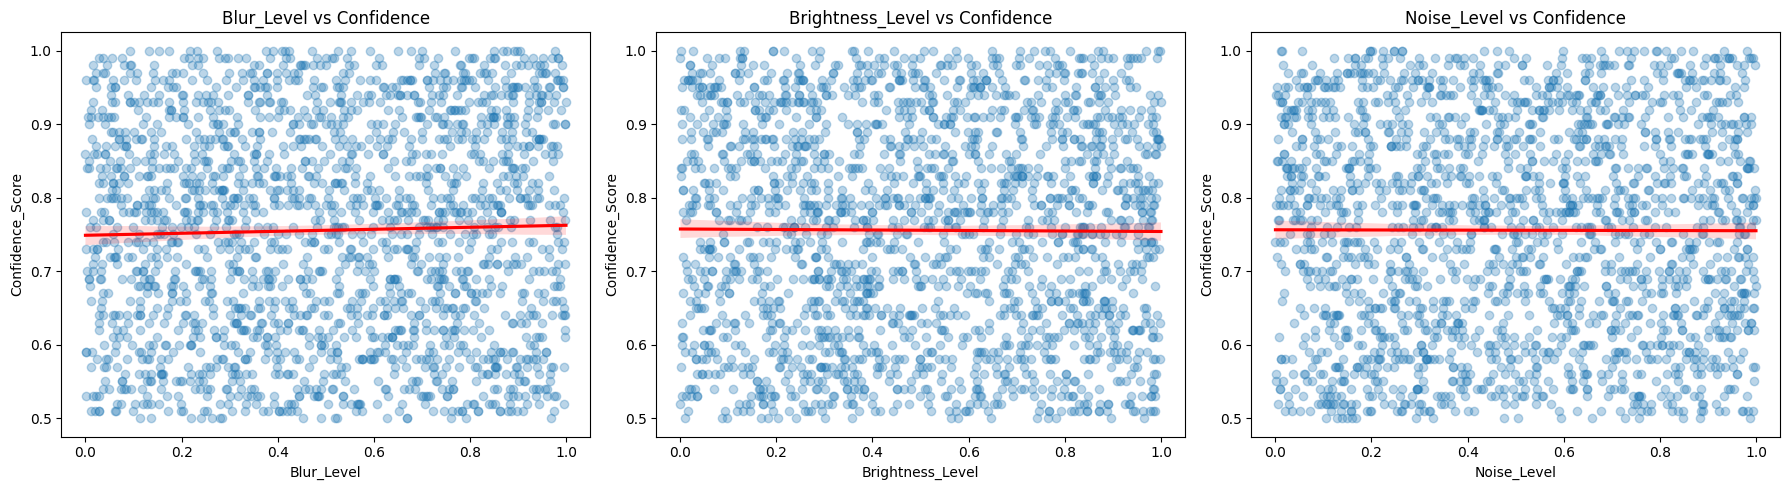

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

quality_metrics = ['Blur_Level', 'Brightness_Level', 'Noise_Level']
colors = ['teal', 'orange', 'purple']

for i, metric in enumerate(quality_metrics):
    sns.regplot(data=df, x=metric, y='Confidence_Score',
                ax=axes[i], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axes[i].set_title(f'{metric} vs Confidence')

plt.tight_layout()
plt.show()

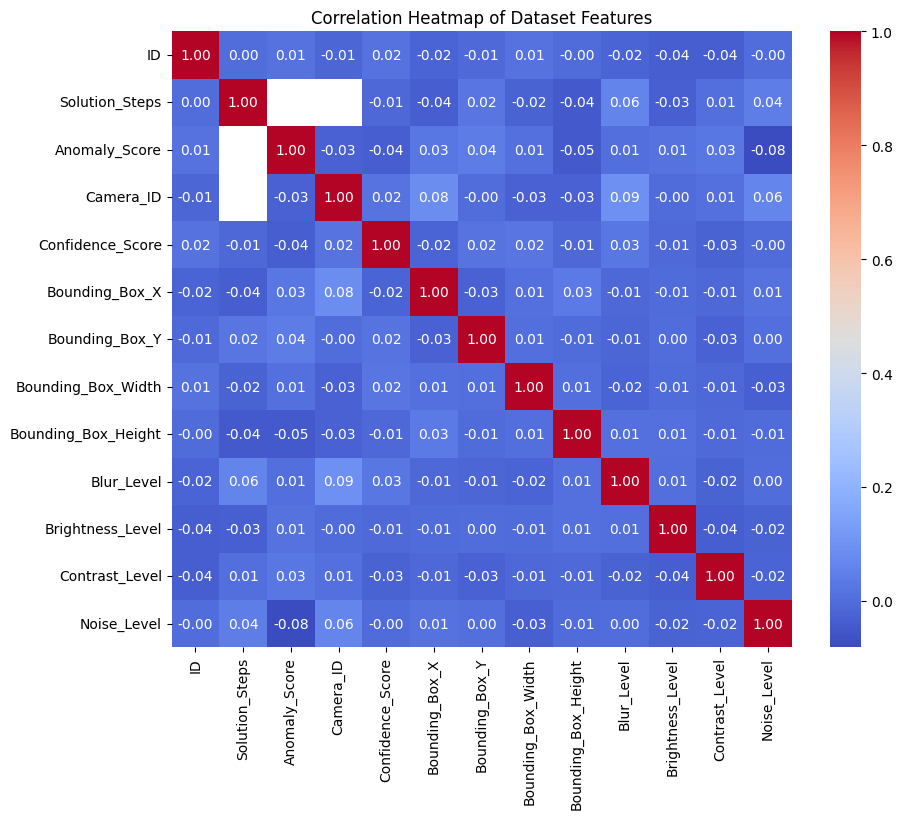

In [56]:
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Dataset Features')
plt.show()

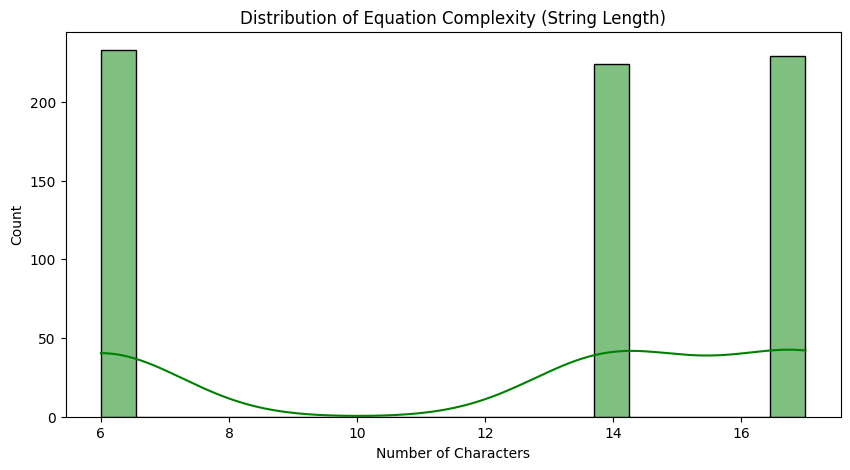

In [57]:
if 'Equation' in df.columns:
    df['Eq_Length'] = df['Equation'].str.len()

    plt.figure(figsize=(10, 5))
    sns.histplot(df['Eq_Length'], bins=20, kde=True, color='green')
    plt.title('Distribution of Equation Complexity (String Length)')
    plt.xlabel('Number of Characters')
    plt.show()

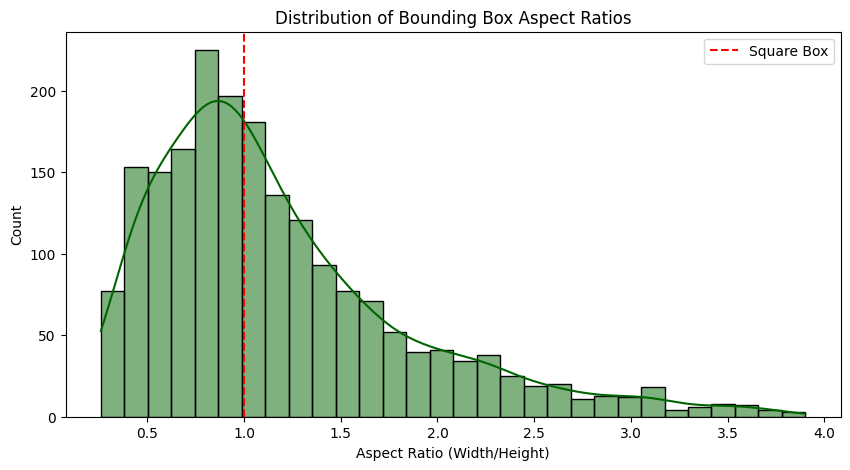

In [58]:
# Aspect Ratio = Width / Height
df['Aspect_Ratio'] = df['Bounding_Box_Width'] / df['Bounding_Box_Height']

plt.figure(figsize=(10, 5))
sns.histplot(df['Aspect_Ratio'], bins=30, kde=True, color='darkgreen')
plt.axvline(1.0, color='red', linestyle='--', label='Square Box')
plt.title('Distribution of Bounding Box Aspect Ratios')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.legend()
plt.show()

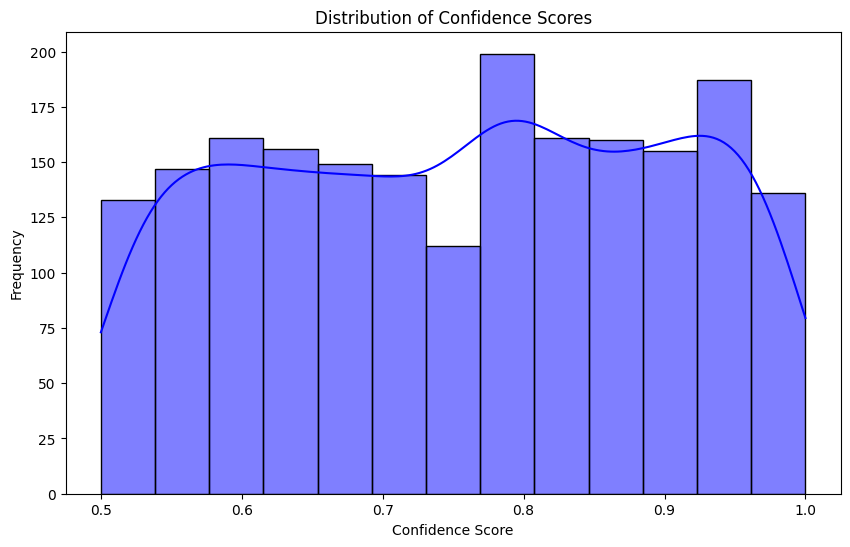

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Confidence_Score'], kde=True, color='blue')
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-2920149394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='viridis')


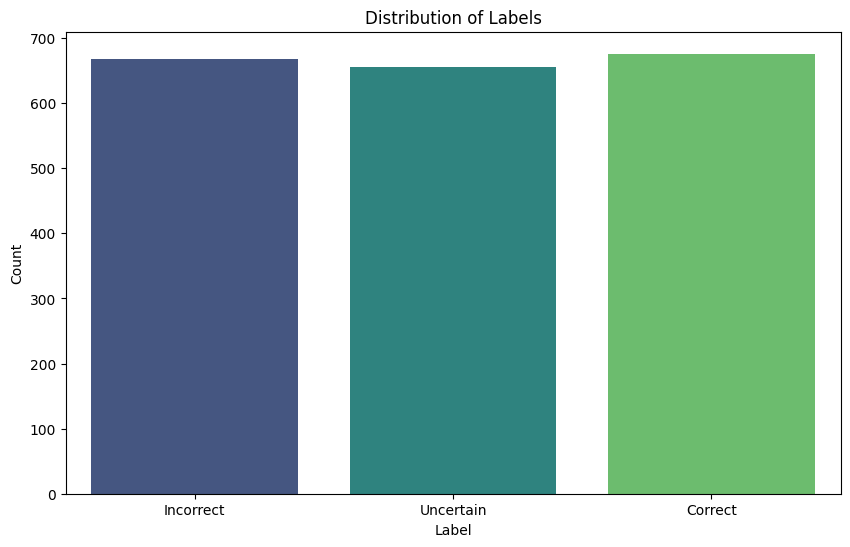

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label', palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

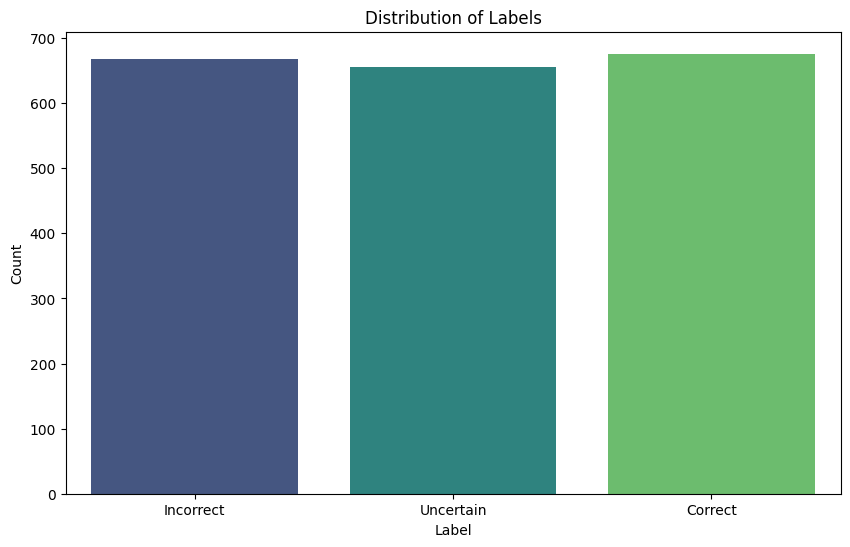

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label', hue='Label', palette='viridis', legend=False)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

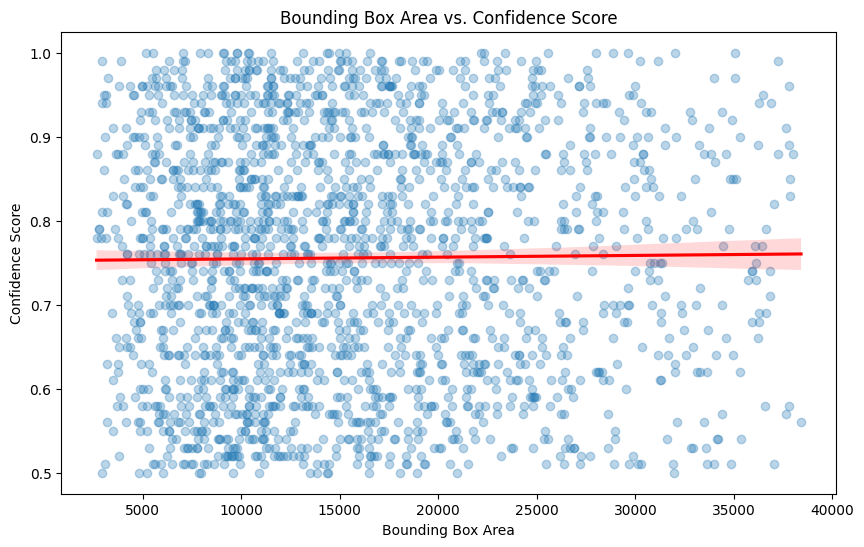

In [62]:
df['Bounding_Box_Area'] = df['Bounding_Box_Width'] * df['Bounding_Box_Height']

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Bounding_Box_Area', y='Confidence_Score', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Bounding Box Area vs. Confidence Score')
plt.xlabel('Bounding Box Area')
plt.ylabel('Confidence Score')
plt.show()

/tmp/ipython-input-3109990712.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Category', y=metric, ax=axes[i], palette='viridis')
/tmp/ipython-input-3109990712.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Category', y=metric, ax=axes[i], palette='viridis')
/tmp/ipython-input-3109990712.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Category', y=metric, ax=axes[i], palette='viridis')


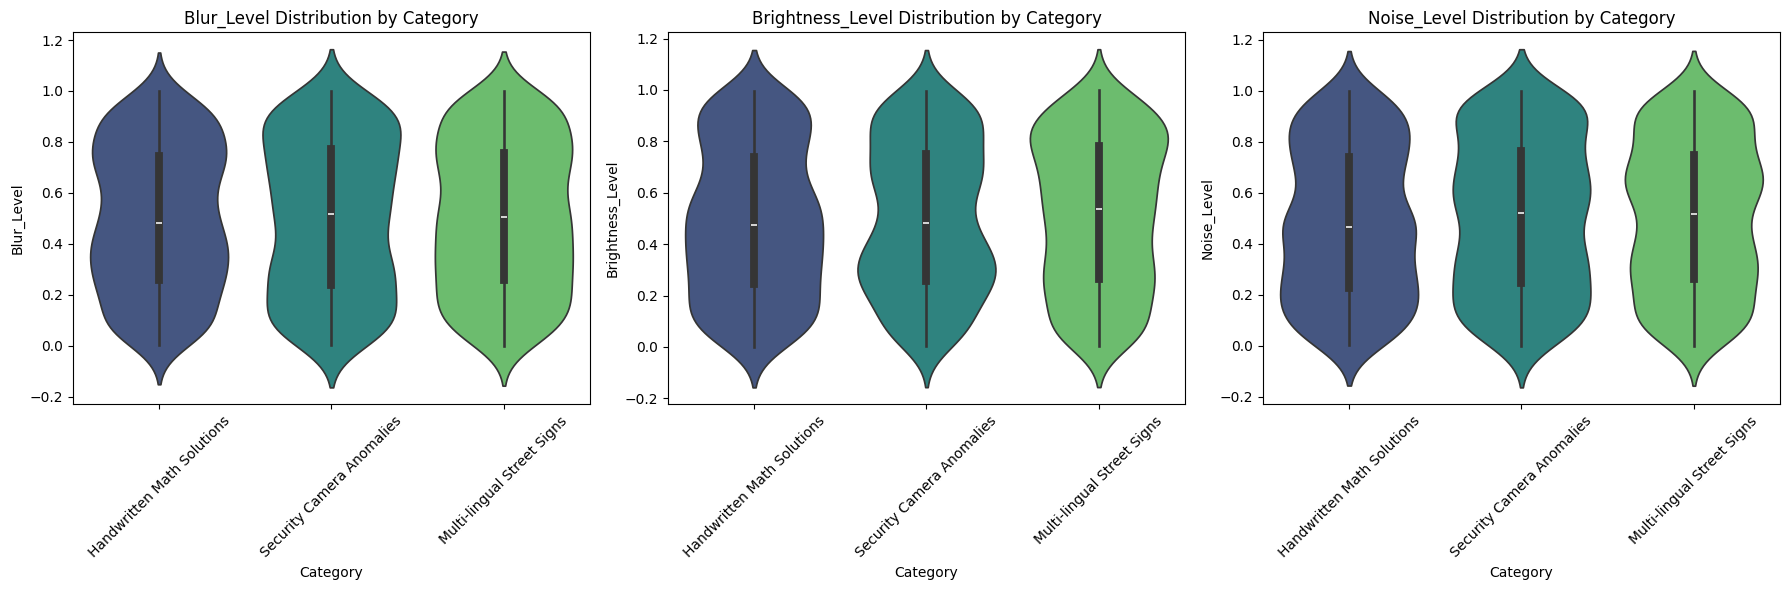

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

quality_metrics = ['Blur_Level', 'Brightness_Level', 'Noise_Level']

for i, metric in enumerate(quality_metrics):
    sns.violinplot(data=df, x='Category', y=metric, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric} Distribution by Category')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

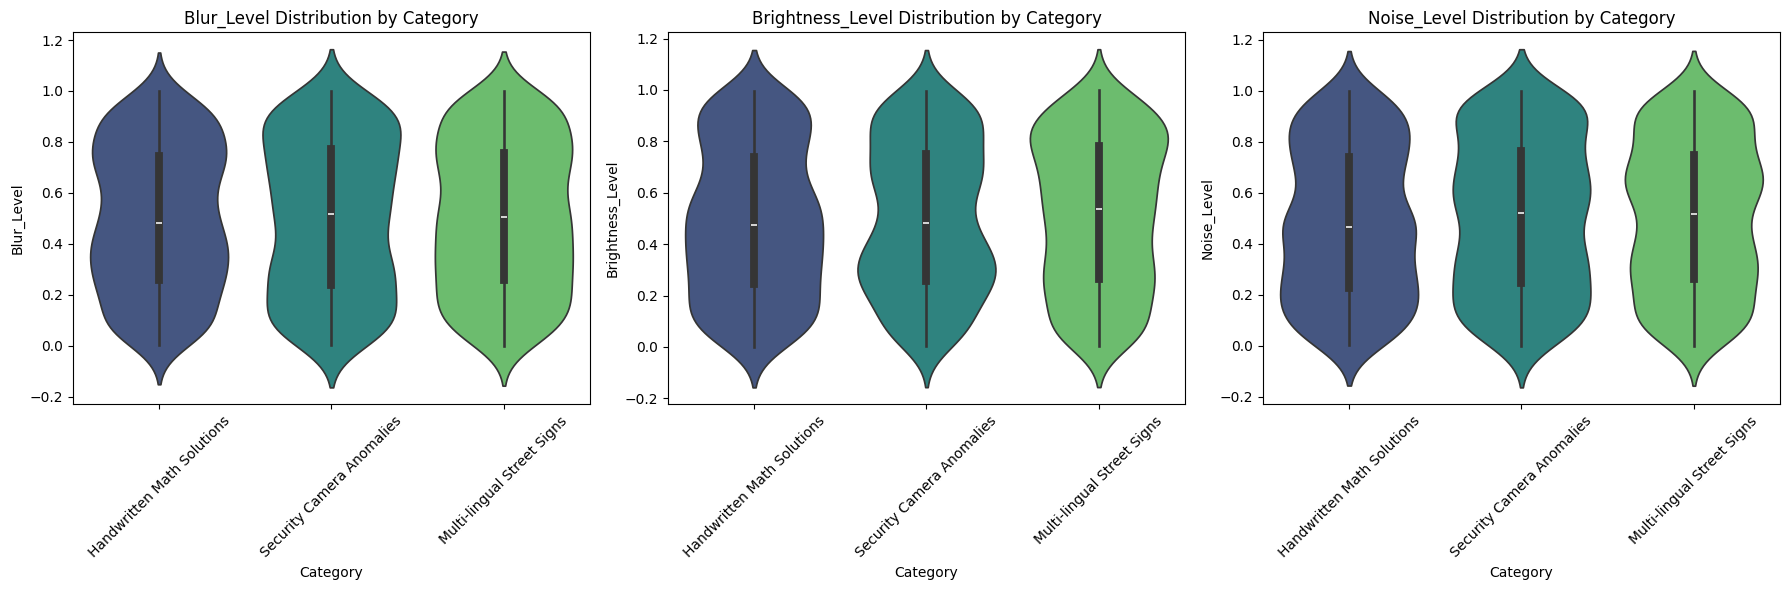

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

quality_metrics = ['Blur_Level', 'Brightness_Level', 'Noise_Level']

for i, metric in enumerate(quality_metrics):
    sns.violinplot(data=df, x='Category', y=metric, ax=axes[i], hue='Category', palette='viridis', legend=False)
    axes[i].set_title(f'{metric} Distribution by Category')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Cloud Service Outage Dataset



In [65]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np

# Download latest version
path = kagglehub.dataset_download("mirzayasirabdullah07/cloud-service-outage-dataset")

print("Path to dataset files:", path)

csv_file = [f for f in os.listdir(path)][0]

df_ecommerce = pd.read_csv(os.path.join(path, csv_file), sep=';')

print("DataFrame Head:")
print(df_ecommerce.head())

print("\nDataFrame Info:")
df_ecommerce.info()

print("\nDataFrame Descriptive Statistics:")
print(df_ecommerce.describe())

Using Colab cache for faster access to the 'cloud-service-outage-dataset' dataset.
Path to dataset files: /kaggle/input/cloud-service-outage-dataset
DataFrame Head:
  incident_id,cloud_provider,region,service,service_subtype,start_time,end_time,duration_minutes,severity,status,root_cause_category,root_cause_description,number_of_customers_affected,estimated_revenue_loss_usd,sla_violation,region_impact_score,service_impact_score,ticket_count,ticket_response_time_minutes,ticket_resolution_time_minutes,monitoring_alerts_triggered,detection_method,mitigation_action,number_of_engineers_involved,engineer_response_time_minutes,communication_channels_used,public_status_page_updated,status_page_update_count,user_feedback_score,post_mortem_completed,post_mortem_link,is_recurrent_issue,previous_incident_id,external_factors,scheduled_maintenance_conflict,patch_applied,system_load_before_outage,system_load_after_outage,backup_system_triggered,notes
0  aeb380d2-6559-4d99-abfb-17e1c45e831b,AWS,europ.

In [66]:
df_ecommerce = pd.read_csv(os.path.join(path, csv_file), sep=',')

print("DataFrame Head (reloaded with correct delimiter):")
print(df_ecommerce.head())

print("\nDataFrame Info (reloaded with correct delimiter):")
df_ecommerce.info()

print("\nDataFrame Descriptive Statistics (reloaded with correct delimiter):")
print(df_ecommerce.describe())

DataFrame Head (reloaded with correct delimiter):
                            incident_id cloud_provider           region  \
0  aeb380d2-6559-4d99-abfb-17e1c45e831b            AWS     europe-west2   
1  ddf7e3a0-f44d-4c94-ae32-189213321e2d            IBM  asia-southeast1   
2  b17b9c80-94a0-4ca5-b52f-f1e7853b1240            AWS     europe-west2   
3  c856b404-e22e-4f84-8bed-9b1512adc9b5            AWS  asia-southeast1   
4  42a85996-663a-4f92-94e1-0f205a06db01            IBM  asia-southeast1   

   service  service_subtype                  start_time  \
0  Storage               S3  2025-06-30 10:18:08.524480   
1    AI/ML              RDS  2025-06-28 10:18:08.524591   
2  Storage               S3  2025-06-01 10:18:08.524638   
3  Compute           Lambda  2025-11-30 10:18:08.524678   
4    AI/ML  Cloud Functions  2025-02-16 10:18:08.524719   

                     end_time  duration_minutes severity         status  ...  \
0  2025-06-30 13:15:08.524480               177      Low     Mon

/tmp/ipython-input-595365420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ecommerce, x='cloud_provider', ax=axes[0], palette='viridis')
/tmp/ipython-input-595365420.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ecommerce, x='severity', ax=axes[1], palette='magma')
/tmp/ipython-input-595365420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ecommerce, x='root_cause_category', ax=axes[2], palette='cividis')


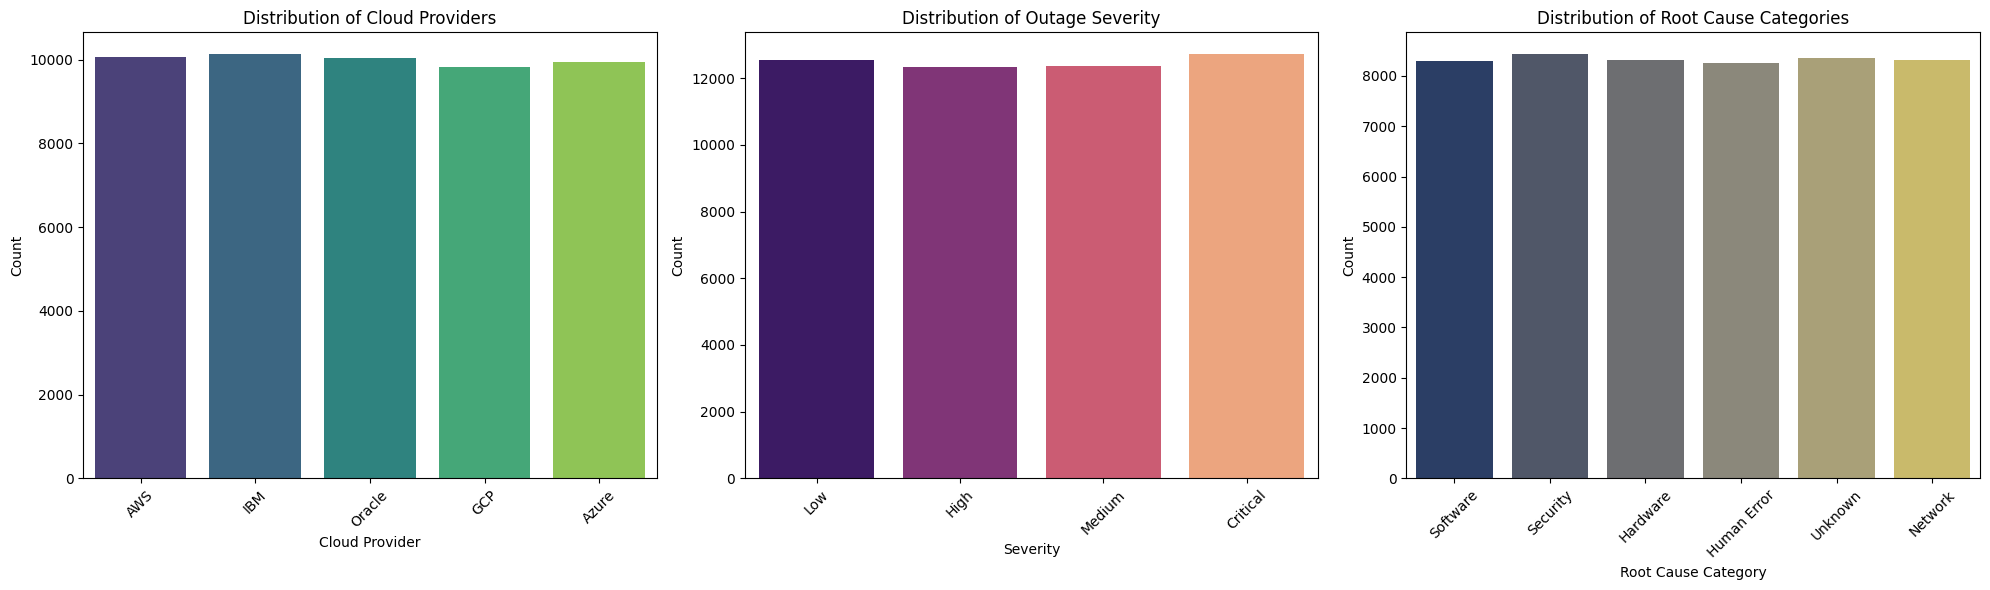

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(data=df_ecommerce, x='cloud_provider', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Cloud Providers')
axes[0].set_xlabel('Cloud Provider')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df_ecommerce, x='severity', ax=axes[1], palette='magma')
axes[1].set_title('Distribution of Outage Severity')
axes[1].set_xlabel('Severity')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df_ecommerce, x='root_cause_category', ax=axes[2], palette='cividis')
axes[2].set_title('Distribution of Root Cause Categories')
axes[2].set_xlabel('Root Cause Category')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

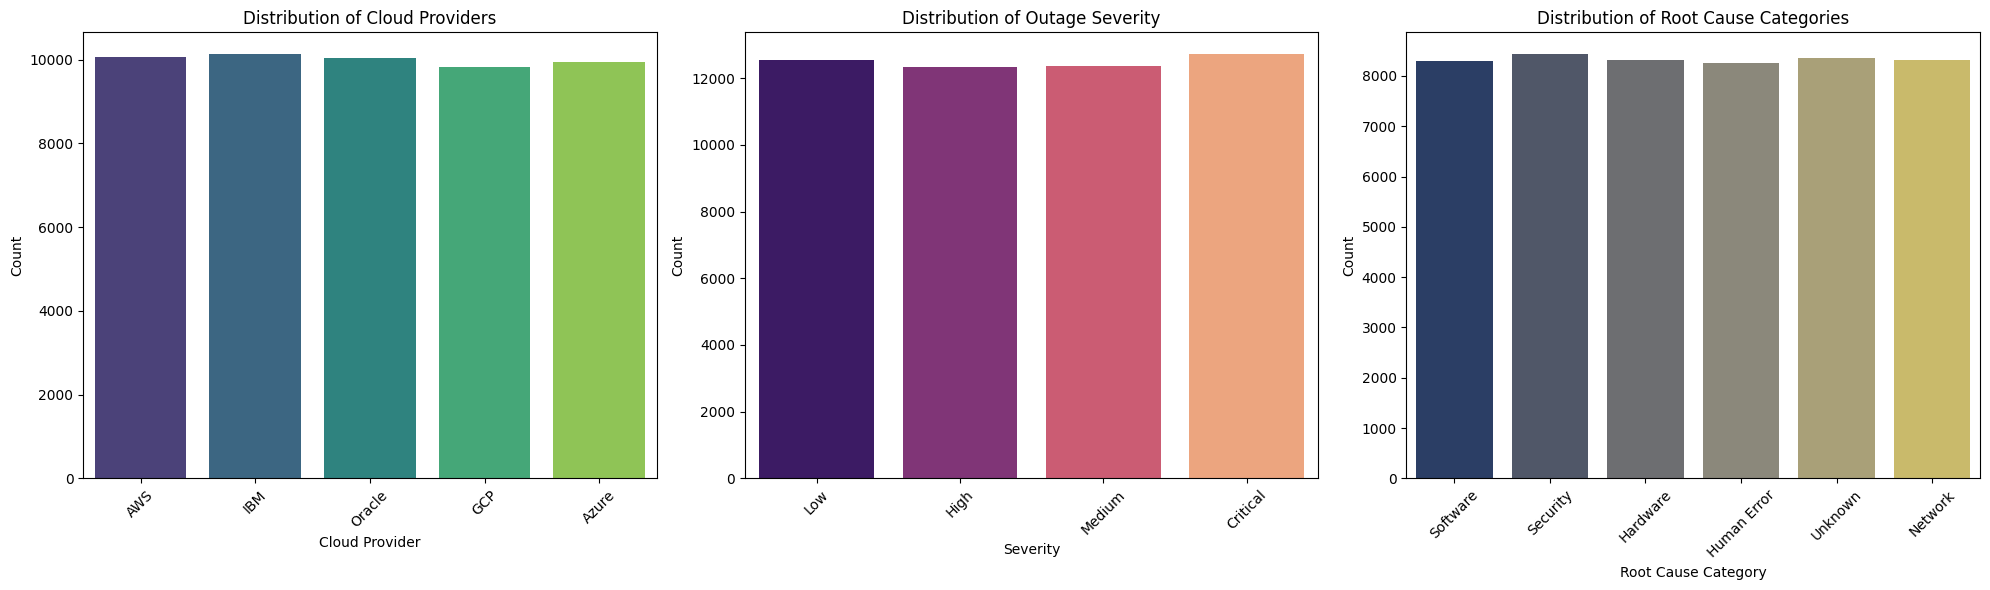

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(data=df_ecommerce, x='cloud_provider', hue='cloud_provider', ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Distribution of Cloud Providers')
axes[0].set_xlabel('Cloud Provider')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df_ecommerce, x='severity', hue='severity', ax=axes[1], palette='magma', legend=False)
axes[1].set_title('Distribution of Outage Severity')
axes[1].set_xlabel('Severity')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df_ecommerce, x='root_cause_category', hue='root_cause_category', ax=axes[2], palette='cividis', legend=False)
axes[2].set_title('Distribution of Root Cause Categories')
axes[2].set_xlabel('Root Cause Category')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

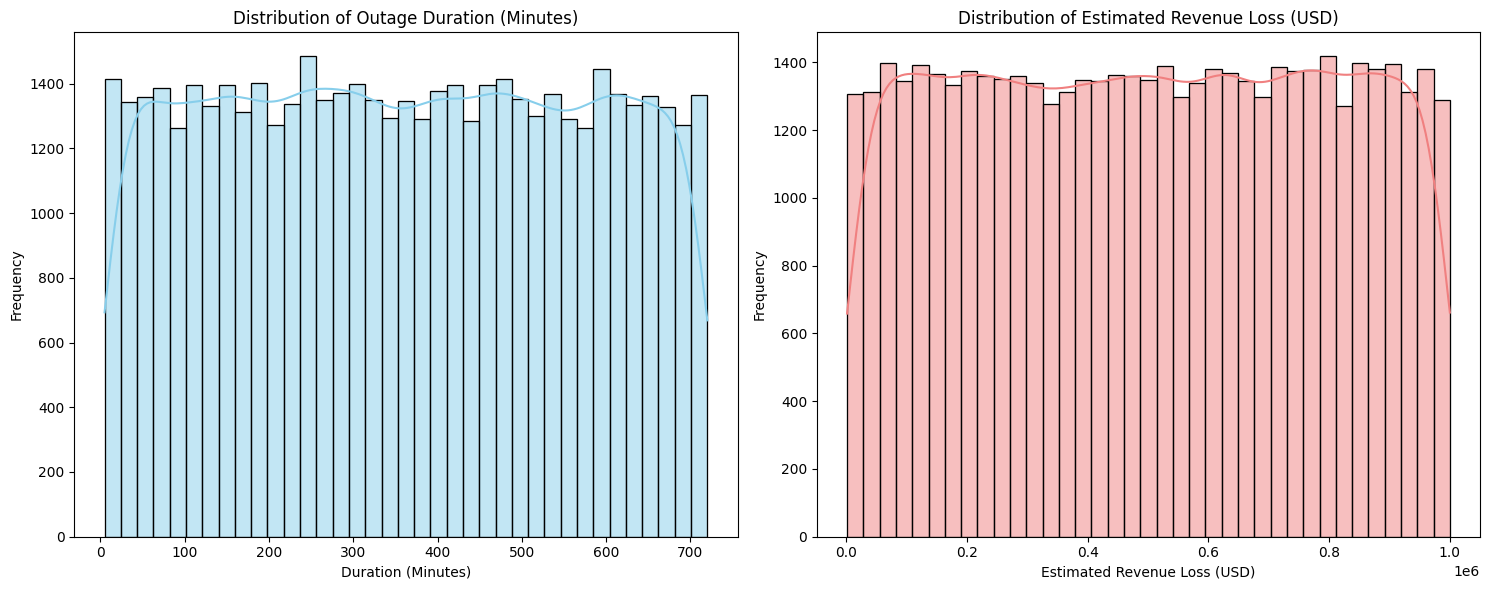

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df_ecommerce['duration_minutes'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Outage Duration (Minutes)')
axes[0].set_xlabel('Duration (Minutes)')
axes[0].set_ylabel('Frequency')

sns.histplot(df_ecommerce['estimated_revenue_loss_usd'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribution of Estimated Revenue Loss (USD)')
axes[1].set_xlabel('Estimated Revenue Loss (USD)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2953925653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ecommerce, x='severity', y='duration_minutes', ax=axes[0], palette='viridis')
/tmp/ipython-input-2953925653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ecommerce, x='cloud_provider', y='estimated_revenue_loss_usd', ax=axes[1], palette='magma')


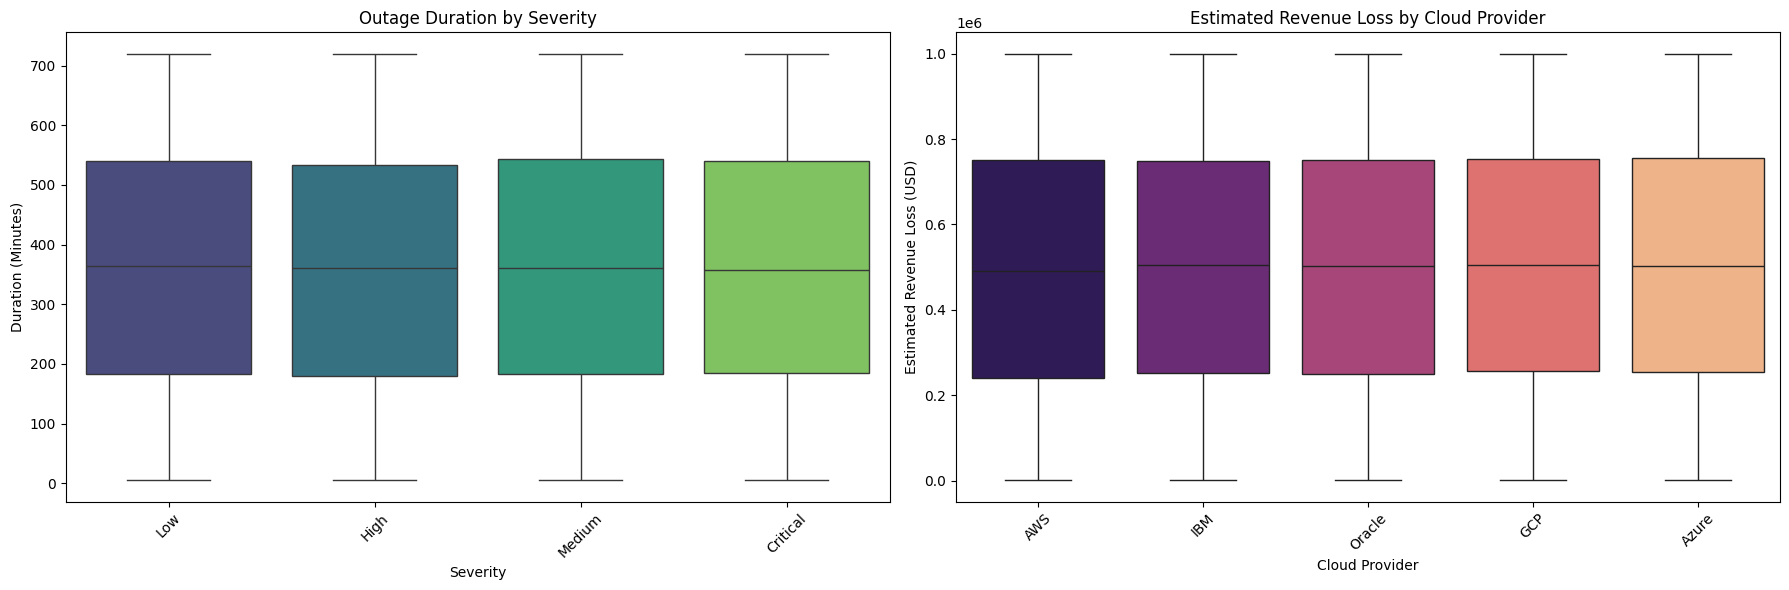

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df_ecommerce, x='severity', y='duration_minutes', ax=axes[0], palette='viridis')
axes[0].set_title('Outage Duration by Severity')
axes[0].set_xlabel('Severity')
axes[0].set_ylabel('Duration (Minutes)')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_ecommerce, x='cloud_provider', y='estimated_revenue_loss_usd', ax=axes[1], palette='magma')
axes[1].set_title('Estimated Revenue Loss by Cloud Provider')
axes[1].set_xlabel('Cloud Provider')
axes[1].set_ylabel('Estimated Revenue Loss (USD)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

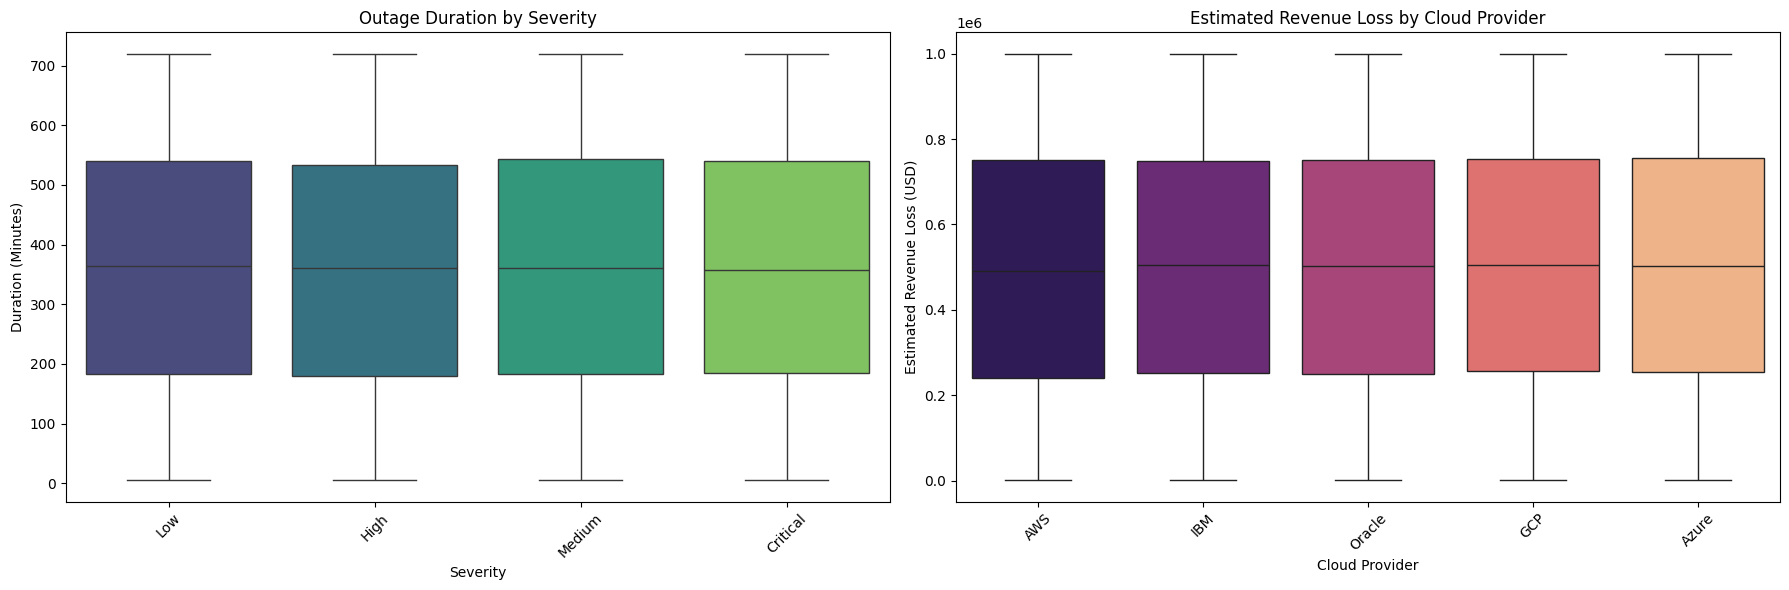

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df_ecommerce, x='severity', y='duration_minutes', ax=axes[0], palette='viridis', hue='severity', legend=False)
axes[0].set_title('Outage Duration by Severity')
axes[0].set_xlabel('Severity')
axes[0].set_ylabel('Duration (Minutes)')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_ecommerce, x='cloud_provider', y='estimated_revenue_loss_usd', ax=axes[1], palette='magma', hue='cloud_provider', legend=False)
axes[1].set_title('Estimated Revenue Loss by Cloud Provider')
axes[1].set_xlabel('Cloud Provider')
axes[1].set_ylabel('Estimated Revenue Loss (USD)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

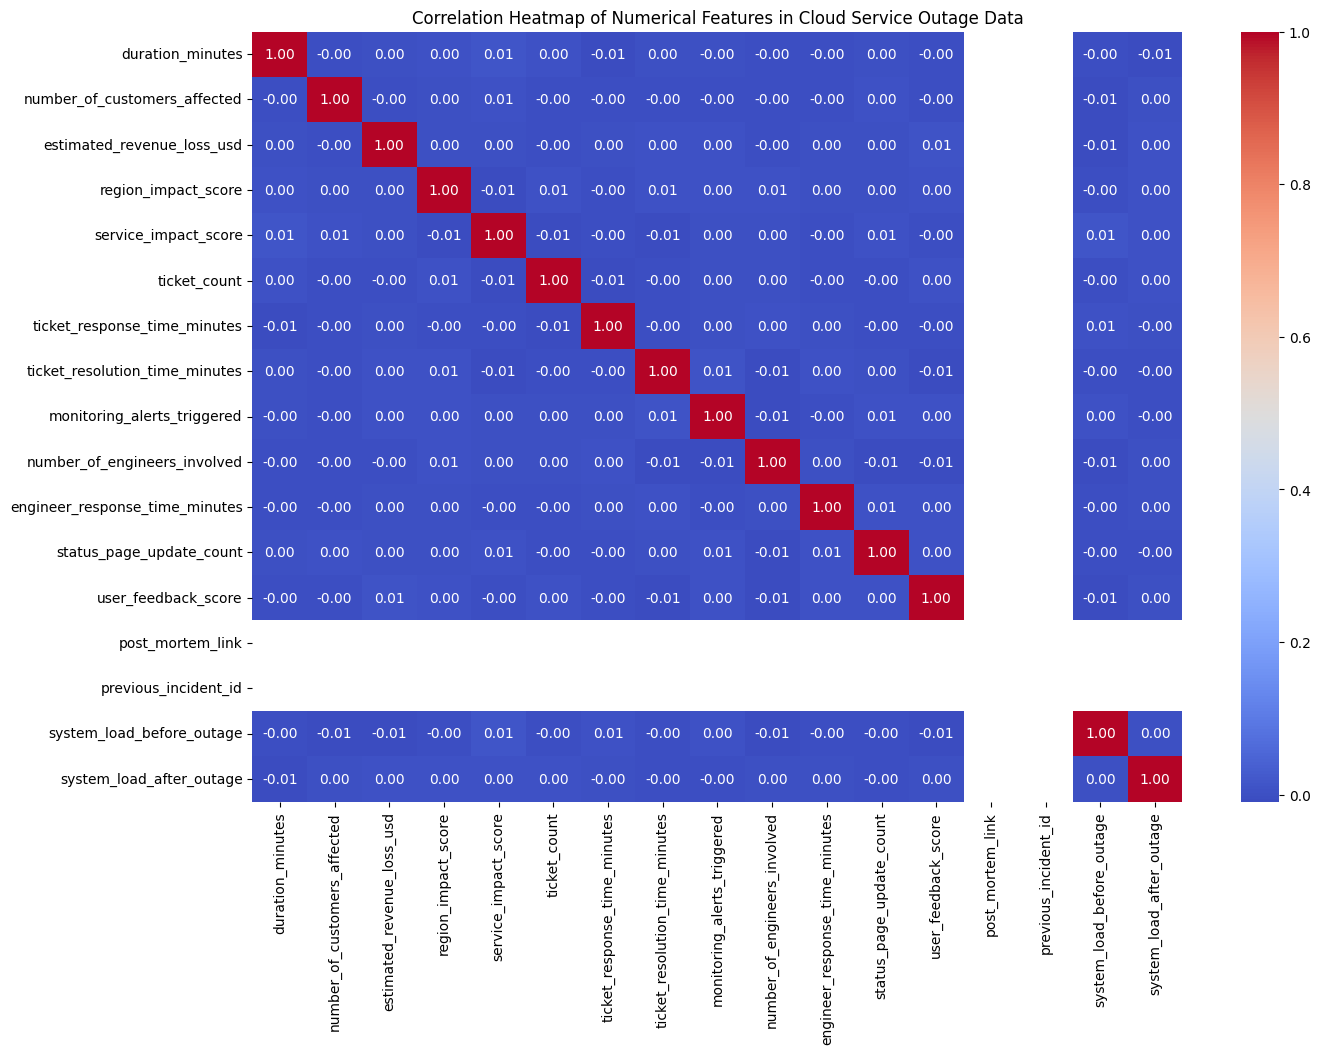

In [72]:
plt.figure(figsize=(15, 10))
correlation_matrix = df_ecommerce.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features in Cloud Service Outage Data')
plt.show()

/tmp/ipython-input-1207314362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_ecommerce, x='root_cause_category', y='duration_minutes', palette='viridis')


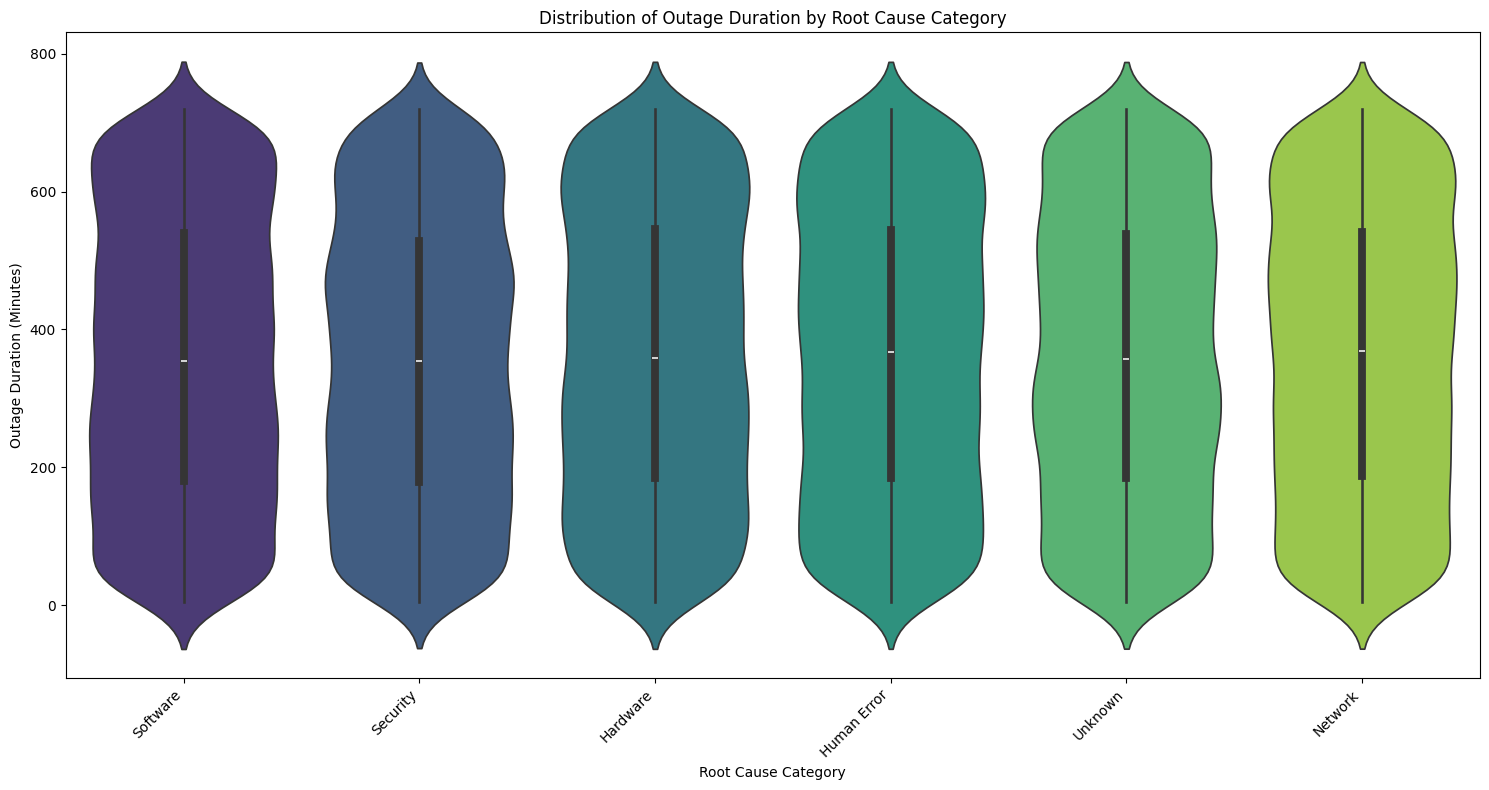

In [73]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=df_ecommerce, x='root_cause_category', y='duration_minutes', palette='viridis')
plt.title('Distribution of Outage Duration by Root Cause Category')
plt.xlabel('Root Cause Category')
plt.ylabel('Outage Duration (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

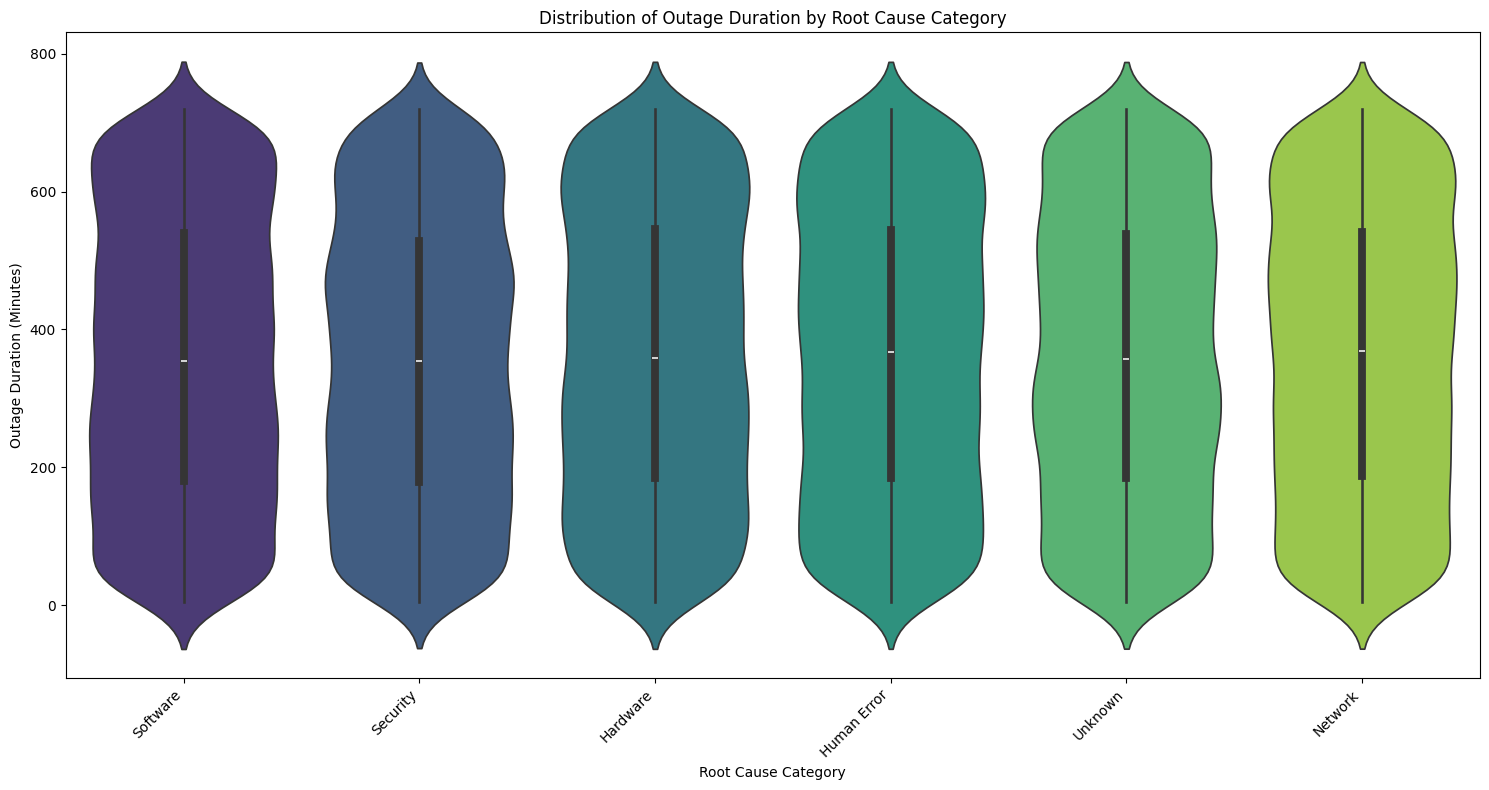

In [74]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=df_ecommerce, x='root_cause_category', y='duration_minutes', hue='root_cause_category', palette='viridis', legend=False)
plt.title('Distribution of Outage Duration by Root Cause Category')
plt.xlabel('Root Cause Category')
plt.ylabel('Outage Duration (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()